In [1]:
# referencias
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
import pandas as pd
import pyodbc 
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Por questões de segurança a conexão disponibilizada foi descaracterizada e apontada posteriormente para csv do dataset relacionado
''' 
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=XXXXXXXXXX;'
                      'Database=YYYYYYYY;'
                      'Trusted_Connection=yes;')
cursor = conn.cursor()
dataset = pd.read_sql_query('ZZZZZZZZZZZZ',conn)
'''
# atribuindo dataset
dataset = pd.read_csv("dataset_peneg.csv")

In [4]:
# Função para calculo do somatório da variância dos dados em relação ao número de clusters iniciais
def wcss(data): 
    wcss = [] #Within Cluster Sum of Squares (soma dos quadrados do cluster)
    # 10 iterações por um cluster a cada par dos 20 atributos possíveis considerados inicialmente
    for n in range(1, 11):
        kmeans = KMeans(n_clusters=n,init='k-means++')
        kmeans.fit(X=data)
        print (n,kmeans.inertia_)
        wcss.append(kmeans.inertia_)
    return wcss

In [5]:
# Chamando função para somatório da variância dos dados em relação ao número de clusters (soma dos quadrados de cada clusters)
sum_of_squares = wcss(dataset)

1 765937697.8735985
2 543319741.915573
3 449787859.149059
4 385297961.91806275
5 346696384.20077974
6 315122035.2741481
7 285643144.2778526
8 264143445.77483314
9 251146734.71991125
10 240463899.58806184


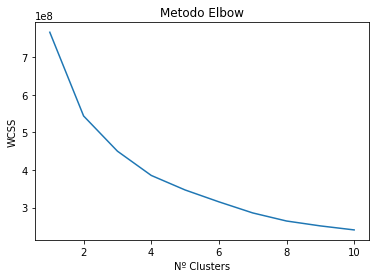

In [6]:
# Verificando a quantidade ideal de cluster calculadas com base e plot em gráfico de cotovelo
plt.plot(range(1, 11), sum_of_squares)
plt.title('Metodo Elbow')
plt.xlabel('Nº Clusters')
plt.ylabel('WCSS') #Within Cluster Sum of Squares (soma dos quadrados do cluster)
plt.show()